In [63]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
p = '/home/mr1142/Documents/Data/models/neumonia'
modelos = os.listdir(p)
modelos = [modelo[:-3] for modelo in modelos if os.path.isfile(os.path.join(p, modelo))]
modelos = [modelo for modelo in modelos if bool(re.search('completo', modelo))]

In [65]:
modelos

['completo_IncResNet_fine-07_batch-8_lr-0001_auc-99',
 'completo_Xception_fine-07_batch-8_lr-0001_auc-99',
 'completo_IncResNet_fine-05_batch-8_lr-0001_auc-99',
 'completo_Xception_fine-05_batch-8_lr-0001_auc-99',
 'completo_IncResNet_fine-03_batch-8_lr-0001_auc-99',
 'completo_Xception_fine-05_batch-8_lr--05_auc-99',
 'completo_mask_IncResNet_fine-05_batch-8_lr-0001_auc-99',
 'completo_mask_Xception_fine-03_batch-8_lr-0001_auc-99',
 'completo_mask_Xception_fine-05_batch-8_lr-0001_auc-99',
 'completo_Xception_fine-07_batch-8_lr--05_auc-99',
 'completo_2_Xception_fine-03_batch-8_lr--05_auc-99',
 'completo_2_Xception_fine-03_batch-8_lr-0001_auc-99',
 'completo_2_Xception_fine-05_batch-8_lr--05_auc-99',
 'completo_Xception_fine-03_batch-8_lr--05_auc-99',
 'completo_Xception_fine-03_batch-8_lr-0001_auc-99',
 'completo_mask_Xception_fine-07_batch-8_lr-0001_auc-99',
 'completo_mask_IncResNet_fine-03_batch-8_lr-0001_auc-99',
 'completo_mask_IncResNet_fine-07_batch-8_lr-0001_auc-98',
 'complet

# COMPLETOS

In [97]:
path = '/home/mr1142/Documents/Data/models/neumonia/training_data/train_max_completo.csv'
df = pd.read_csv(path)

In [86]:
df.sort_values('val_auc')

,name,modelo,fine,batch,lr,mask,trainprop,pixels,subset,loss,binary_accuracy,precision,auc,val_loss,val_binary_accuracy,val_precision,val_auc
8,completo_mask_IncResNet_fine-07_batch-8_lr-000...,IncResNet,0.7,8,0.00010,1,0.8,512,0.0,0.526373,0.992016,0.988154,0.999222,0.329414,0.963645,0.945883,0.989141
18,completo_Xception_fine-07_batch-8_lr--05_auc-99,Xception,0.7,8,0.00004,False,0.8,512,False,0.401612,0.996884,0.995325,0.999815,0.285393,0.969358,0.954036,0.990175
11,completo_mask_Xception_fine-07_batch-8_lr-0001...,Xception,0.7,8,0.00010,1,0.8,512,0.0,0.392386,0.993703,0.990572,0.999655,0.540228,0.964217,0.946532,0.991175
19,completo_Xception_fine-07_batch-8_lr--05_auc-99,Xception,0.7,8,0.00006,False,0.8,512,False,0.363762,0.996469,0.994702,0.999739,0.290578,0.973928,0.961035,0.991489
1,completo_Xception_fine-07_batch-8_lr-0001_auc-99,Xception,0.7,8,0.00010,0,0.7,512,0.0,0.349323,0.996326,0.994507,0.999500,0.226185,0.974344,0.961658,0.991506
24,completo_2_Xception_fine-05_batch-8_lr--05_auc-99,Xception,0.5,8,0.00004,False,0.8,512,False,0.381296,0.995832,0.993767,0.999747,0.327102,0.969306,0.954170,0.992108
20,completo_Xception_fine-07_batch-8_lr-0001_auc-99,Xception,0.7,8,0.00010,False,0.8,512,False,0.340248,0.994846,0.992286,0.999496,0.200627,0.971799,0.957768,0.992982
4,completo_Xception_fine-03_batch-8_lr-0001_auc-99,Xception,0.3,8,0.00010,0,0.7,512,0.0,0.378762,0.994950,0.992481,0.999413,0.227558,0.975902,0.963852,0.993302
12,completo_Xception_fine-03_batch-8_lr--05_auc-99,Xception,0.3,8,0.00004,False,0.8,512,False,0.378279,0.996274,0.994429,0.999659,0.234205,0.977823,0.966807,0.993343
15,completo_Xception_fine-05_batch-8_lr--05_auc-99,Xception,0.5,8,0.00004,False,0.8,512,False,0.373578,0.997923,0.996884,0.999809,0.322127,0.976837,0.965399,0.993788


In [14]:
evaluados_de_mas = list(set(list(df.name))-set(modelos))
ix = [i for i in df.index if df.name[i] in evaluados_de_mas]
evaluados_de_mas

[]

In [15]:
evaluados_de_menos = list(set(modelos)-set(list(df.name)))
evaluados_de_menos

[]

## TEST

In [73]:
path = '/home/mr1142/Documents/Data/models/neumonia/validation_results/image_class_evaluation_completo.csv'
df_test = pd.read_csv(path)

In [74]:
df_test.sort_values('auc')

,nombre,loss,binary_accuracy,precision,auc
19,completo_Xception_fine-05_batch-8_lr-0001_auc-...,1.545769,0.836082,0.754482,0.868869
8,completo_mask_IncResNet_fine-07_batch-8_lr-000...,0.192334,0.956686,0.935162,0.988577
11,completo_mask_Xception_fine-07_batch-8_lr-0001...,0.164005,0.964112,0.946237,0.991175
14,completo_Xception_fine-07_batch-8_lr--05_auc-9...,0.158590,0.969514,0.954340,0.991489
0,completo_Xception_fine-07_batch-8_lr-0001_auc-...,0.149313,0.963126,0.945103,0.992982
9,completo_mask_Xception_fine-03_batch-8_lr-0001...,0.118628,0.976265,0.964469,0.993046
18,completo_2_Xception_fine-05_batch-8_lr-0001_au...,0.116345,0.976940,0.965410,0.993354
17,completo_2_Xception_fine-05_batch-8_lr--05_auc...,0.118676,0.979278,0.968989,0.993500
13,completo_Xception_fine-05_batch-8_lr--05_auc-9...,0.146903,0.964892,0.948314,0.993808
1,completo_IncResNet_fine-07_batch-8_lr-0001_auc...,0.135543,0.969929,0.955105,0.994037


In [18]:
modelos_evaluados = [model[:-4] for model in df_test.nombre]

In [19]:
evaluados_de_mas = list(set(modelos_evaluados)-set(modelos))
ix = [i for i in df_test.index if df_test.nombre[i][:-4] in evaluados_de_mas]
evaluados_de_mas

[]

In [20]:
evaluados_de_menos = list(set(modelos)-set(modelos_evaluados))
evaluados_de_menos

[]

## PREDICTION

In [89]:
path = '/home/mr1142/Documents/Data/models/neumonia/validation_results/prediction_validation_metrics_completo.csv'
df = pd.read_csv(path)

In [80]:
df['auc_mean'] = (df.auc_0 + df.auc_1 + df.auc_2)/3
df['f1_score_mean'] = (df.f1_score_0 + df.f1_score_1 + df.f1_score_2)/3

In [ ]:
df.columns

Index(['name', 'auc_0', 'younden_0', 'pr_max_0', 'pr_cut_0', 'auc_1',
       'younden_1', 'pr_max_1', 'pr_cut_1', 'auc_2', 'younden_2', 'pr_max_2',
       'pr_cut_2', 'f1_score_0', 'precision_score_0', 'recall_score_0',
       'accuracy_score_0', 'f1_score_1', 'precision_score_1', 'recall_score_1',
       'accuracy_score_1', 'f1_score_2', 'precision_score_2', 'recall_score_2',
       'accuracy_score_2', 'f1_score[0, 1]', 'precision_score[0, 1]',
       'recall_score[0, 1]', 'accuracy_score[0, 1]', 'f1_score[0, 2]',
       'precision_score[0, 2]', 'recall_score[0, 2]', 'accuracy_score[0, 2]',
       'f1_score[1, 2]', 'precision_score[1, 2]', 'recall_score[1, 2]',
       'accuracy_score[1, 2]', 'auc_mean', 'f1_score_mean'],
      dtype='object')

In [82]:
df.sort_values('f1_score_mean')

,name,auc_0,younden_0,pr_max_0,pr_cut_0,auc_1,younden_1,pr_max_1,pr_cut_1,auc_2,...,"f1_score[0, 2]","precision_score[0, 2]","recall_score[0, 2]","accuracy_score[0, 2]","f1_score[1, 2]","precision_score[1, 2]","recall_score[1, 2]","accuracy_score[1, 2]",auc_mean,f1_score_mean
19,completo_Xception_fine-05_batch-8_lr-0001_auc-...,0.975428,0.999512,0.998592,0.999847,0.877360,0.001748,0.000206,0.078888,0.929952,...,0.872747,0.870652,0.877381,0.877381,0.623933,0.730047,0.575207,0.575207,0.927580,0.825668
8,completo_mask_IncResNet_fine-07_batch-8_lr-000...,0.992078,0.468461,0.583882,0.750423,0.979893,0.151667,0.249481,0.285111,0.996984,...,0.788454,0.868621,0.782643,0.782643,0.971919,0.972332,0.971798,0.971798,0.989652,0.956672
0,completo_Xception_fine-07_batch-8_lr-0001_auc-99,0.996383,0.316501,0.456009,0.633445,0.986430,0.423560,0.685292,0.531865,0.995642,...,0.753443,0.854179,0.748987,0.748987,0.967931,0.968055,0.968059,0.968059,0.992818,0.963135
11,completo_mask_Xception_fine-07_batch-8_lr-0001...,0.995245,0.225799,0.533232,0.587943,0.988947,0.154041,0.283609,0.343061,0.998134,...,0.801645,0.873097,0.796510,0.796510,0.866468,0.896906,0.862886,0.862886,0.994109,0.964003
13,completo_Xception_fine-05_batch-8_lr--05_auc-99,0.996604,0.297515,0.392342,0.562852,0.986509,0.433388,0.433388,0.437964,0.995772,...,0.734616,0.848828,0.730290,0.730290,0.970455,0.970582,0.970396,0.970396,0.992962,0.964759
10,completo_mask_Xception_fine-05_batch-8_lr-0001...,0.995870,0.707168,0.830501,0.818978,0.990312,0.155626,0.188469,0.227831,0.998478,...,0.890551,0.915047,0.887816,0.887816,0.983195,0.983247,0.983172,0.983172,0.994887,0.965438
14,completo_Xception_fine-07_batch-8_lr--05_auc-99,0.996262,0.159862,0.505900,0.816492,0.990143,0.085075,0.219282,0.180050,0.998127,...,0.778649,0.863344,0.773138,0.773138,0.975655,0.976165,0.975538,0.975538,0.994844,0.969509
1,completo_IncResNet_fine-07_batch-8_lr-0001_auc-99,0.995106,0.183686,0.702386,0.771208,0.990941,0.126664,0.418243,0.236509,0.998170,...,0.819083,0.880455,0.813805,0.813805,0.982896,0.983001,0.982861,0.982861,0.994739,0.969942
15,completo_2_Xception_fine-03_batch-8_lr--05_auc-99,0.995850,0.526675,0.526675,0.727371,0.991217,0.226949,0.449240,0.261597,0.998391,...,0.772099,0.863080,0.765503,0.765503,0.979212,0.979577,0.979121,0.979121,0.995153,0.972542
5,completo_IncResNet_fine-05_batch-8_lr-0001_auc-99,0.996531,0.142714,0.518166,0.548558,0.990831,0.402463,0.479423,0.411170,0.998190,...,0.715258,0.844118,0.712683,0.712683,0.981034,0.981169,0.980991,0.980991,0.995184,0.972764


In [24]:
evaluados_de_mas = list(set(list(df.name))-set(modelos))
ix = [i for i in df.index if df.name[i] in evaluados_de_mas]
evaluados_de_mas

[]

In [17]:
evaluados_de_menos = list(set(modelos)-set(list(df.name)))
evaluados_de_menos

[]

## Cada modelo

In [29]:
import os
import cv2
import json

In [25]:
model_name = 'completo_Xception_fine-05_batch-8_lr-0001_auc-99'

In [26]:
p = os.path.join('/home/mr1142/Documents/Data/models/neumonia/validation_results', model_name)

In [27]:
os.listdir(p)

['metricas.json',
 'pred_rec_plot_0.png',
 'auc_plot_0.png',
 'pr_re_th_plot_0.png',
 'pred_rec_plot_1.png',
 'auc_plot_1.png',
 'pr_re_th_plot_1.png',
 'pred_rec_plot_2.png',
 'auc_plot_2.png',
 'pr_re_th_plot_2.png',
 'class_report.csv']

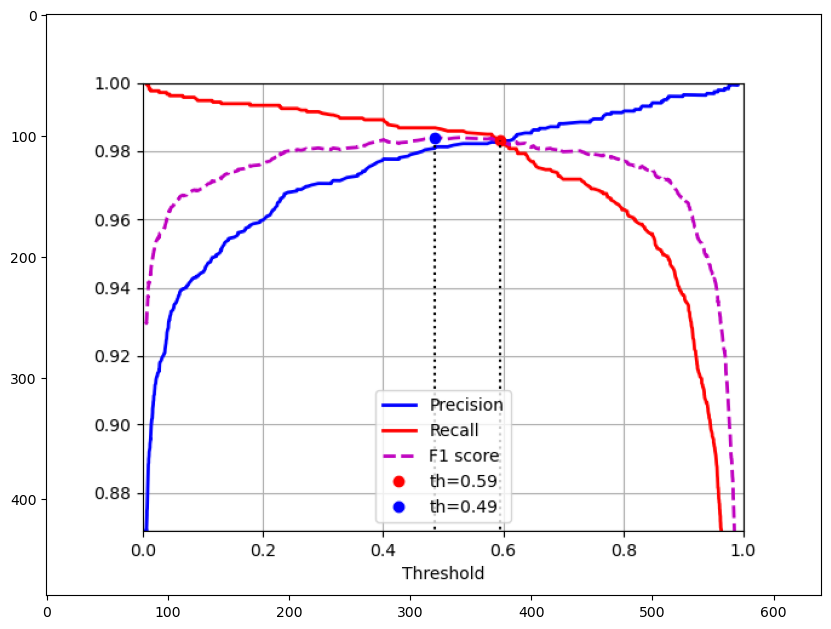

In [38]:
img = cv2.imread(os.path.join(p, 'pr_re_th_plot_2.png'))
plt.figure(figsize=(10,10))
plt.imshow(img)

In [39]:
with open(os.path.join(p, 'metricas.json')) as json_file:
    data = json.load(json_file)
data

{'auc_0': 0.9971487107953183,
 'younden_0': 0.41680774092674255,
 'pr_max_0': 0.6337756514549255,
 'pr_cut_0': 0.7398169040679932,
 'auc_1': 0.9941905355843617,
 'younden_1': 0.20628157258033752,
 'pr_max_1': 0.364291250705719,
 'pr_cut_1': 0.30788731575012207,
 'auc_2': 0.9992411881827004,
 'younden_2': 0.4007461369037628,
 'pr_max_2': 0.48644930124282837,
 'pr_cut_2': 0.5948005318641663,
 'f1_score_0': 0.9758029047281854,
 'precision_score_0': 0.9762616183946862,
 'recall_score_0': 0.9756933624181988,
 'accuracy_score_0': 0.9756933624181988,
 'f1_score_1': 0.9667769394632995,
 'precision_score_1': 0.96705875158965,
 'recall_score_1': 0.9669679027734497,
 'accuracy_score_1': 0.9669679027734497,
 'f1_score_2': 0.9891008884899288,
 'precision_score_2': 0.9891163622932013,
 'recall_score_2': 0.9890931754440636,
 'accuracy_score_2': 0.9890931754440636,
 'f1_score[0, 1]': 0.6496306679028706,
 'precision_score[0, 1]': 0.7931673803025971,
 'recall_score[0, 1]': 0.6477095668432533,
 'accuracy

In [40]:
df = pd.read_csv(os.path.join(p, 'class_report.csv'))
df

,Unnamed: 0,precision,recall,f1-score,support
0,normal,0.946685,0.982791,0.964400,2150.0
1,moderado,0.971191,0.928571,0.949403,2142.0
2,severo,0.980823,0.986359,0.983583,2126.0
3,micro avg,0.965877,0.965877,0.965877,6418.0
4,macro avg,0.966233,0.965907,0.965796,6418.0
5,weighted avg,0.966172,0.965877,0.965749,6418.0
6,samples avg,0.965877,0.965877,0.965877,6418.0
